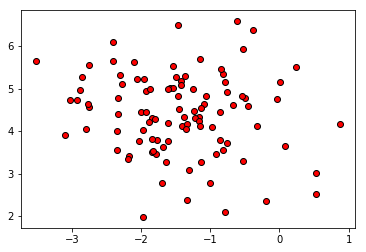

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

blobs = make_blobs(random_state=1, centers=1)
X_blobs = blobs[0]

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c = 'r',edgecolors='k')
plt.show()

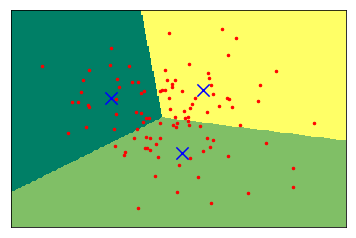

In [7]:
#K均值聚类算法
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

x_min, x_max = X_blobs[:,0].min()-0.5, X_blobs[:, 0].max()+0.5
y_min, y_max = X_blobs[:,1].min()-0.5, X_blobs[:, 1].max()+0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(),xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.summer,
           aspect='auto', origin='lower')

plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize = 5)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s = 150, linewidths=3,
            color = 'b', zorder = 10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
print(kmeans.labels_)

[1 1 0 2 2 2 1 1 0 2 1 2 1 0 1 2 2 1 0 0 2 0 1 1 1 1 2 1 1 1 0 0 1 1 2 0 2
 0 1 0 2 1 0 0 2 2 2 1 0 1 0 1 2 0 2 2 0 2 2 1 2 0 2 1 0 2 0 0 1 2 2 1 2 2
 2 1 2 1 1 0 2 0 2 2 0 1 2 1 0 0 2 1 0 0 2 2 1 2 2 1]


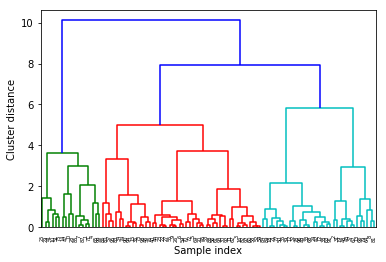

In [9]:
#凝聚聚类算法
from scipy.cluster.hierarchy import dendrogram, ward
linkage = ward(X_blobs)
dendrogram(linkage)
ax = plt.gca()

plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

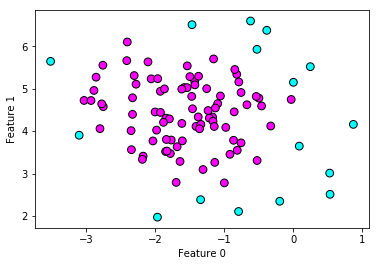

In [10]:
from sklearn.cluster import DBSCAN
db = DBSCAN()

clusters = db.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c = clusters, cmap = plt.cm.cool, s = 60, edgecolors='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()


In [11]:
print(clusters)

[-1  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]


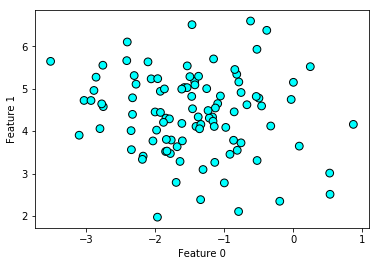

In [13]:
db_1 = DBSCAN(eps=2)

clusters = db_1.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c = clusters, cmap = plt.cm.cool, s = 60, edgecolors='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

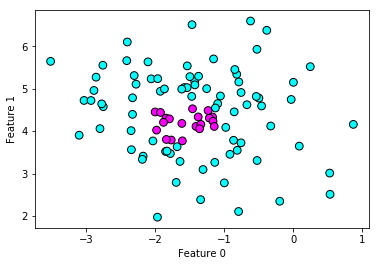

In [14]:
db_2 = DBSCAN(min_samples=20)

clusters = db_2.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c = clusters, cmap = plt.cm.cool, s = 60, edgecolors='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()